In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [132]:
#setting
sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
pd.options.plotting.backend="plotly"
import warnings
warnings.filterwarnings('ignore')

In [133]:
data = pd.read_csv("apples_quality.csv")
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [134]:
#shape dataframe
print(f'Shape of dataframe is: {data.shape}')

Shape of dataframe is: (4000, 9)


In [135]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [136]:
pd.DataFrame(data.dtypes,columns = ["Data Type"])

,Data Type
A_id,int64
Size,float64
Weight,float64
Sweetness,float64
Crunchiness,float64
Juiciness,float64
Ripeness,float64
Acidity,float64
Quality,object


In [137]:
#checking missing data
pd.DataFrame(data.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0
Quality,0


<h1>Visualization Data</h1>

In [138]:
fig = px.histogram(data, x="Quality",
                  template='plotly_dark',
                  color_discrete_sequence = ["#84A9AC"])
fig.update_layout(title = "<b>Counts of good and bad Quality of Apples</b>",
                 title_x = 0.5,
                 title_font = dict(size = 20),
                 uniformtext_minsize = 15)
fig.show()

In [139]:
fig = px.pie(data, names = "Quality",
            title = "<b>Counts of good and bad Quality of apples</b>",
            hole = 0.5, template = "plotly_dark")
fig.update_traces(textposition='inside',
                 textinfo='percent+label',
                 marker=dict(line=dict(color='#000000',width = 1.5)))
fig.update_layout(title_x = 0.5,
                 title_font = dict(size = 20),
                 uniformtext_minsize = 15)
fig.show()

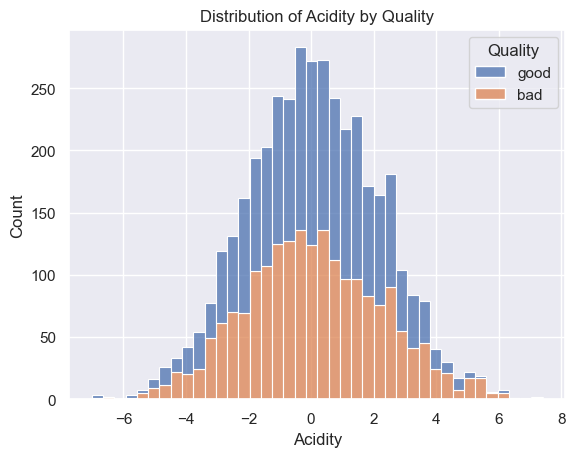

In [140]:

# Assuming 'data' is your DataFrame

sns.histplot(data=data, x='Acidity', hue='Quality', multiple="stack")
plt.xlabel("Acidity")
plt.ylabel("Count")
plt.title("Distribution of Acidity by Quality")
plt.show()

In [141]:
fig = data.groupby('Quality').agg({'Acidity':'mean'}).plot(kind='bar',                                                    
                                                    template = "seaborn",
                                                    labels = {"Quality":"Quality",
                                                              "value":"Acidity"},
                                                    color_discrete_sequence = ["#84b1b5"]);

fig.update_layout(title = "<b>Average Acidity</b>\n",
                  title_font = dict(size = 20),)


fig.show()

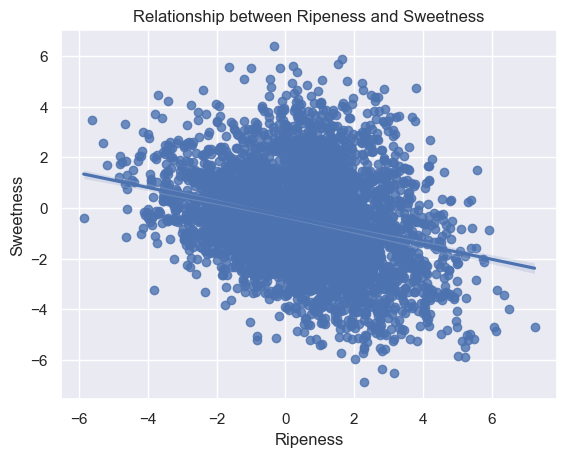

In [142]:
import seaborn as sns

sns.regplot(x='Ripeness', y='Sweetness', data=data)
plt.title('Relationship between Ripeness and Sweetness')
plt.xlabel('Ripeness')
plt.ylabel('Sweetness')
plt.show()

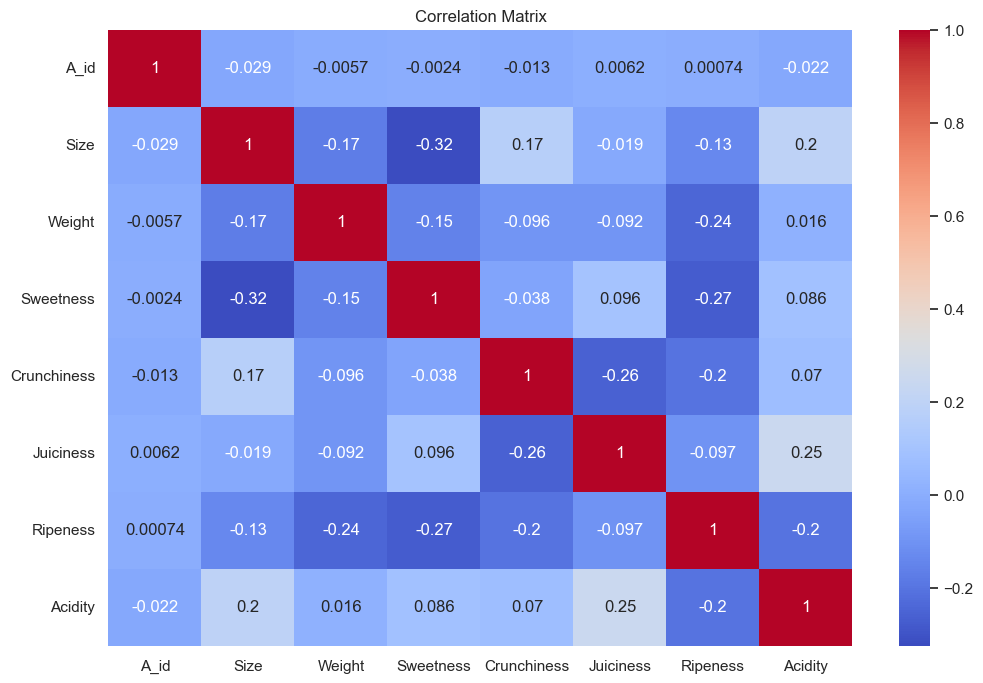

In [144]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

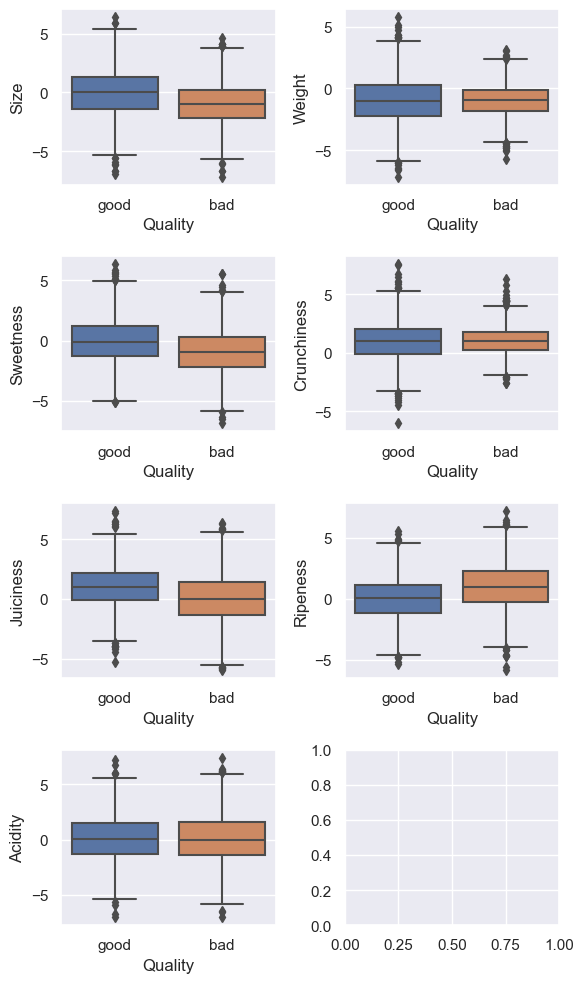

In [145]:
fig, ax = plt.subplots(4, 2, figsize = (6, 10))

sns.boxplot(x = 'Quality', y = 'Size', data = data, ax = ax[0][0])
sns.boxplot(x = 'Quality', y = 'Weight', data = data, ax = ax[0][1])
sns.boxplot(x = 'Quality', y = 'Sweetness', data = data, ax = ax[1][0])
sns.boxplot(x = 'Quality', y = 'Crunchiness', data = data, ax = ax[1][1])
sns.boxplot(x = 'Quality', y = 'Juiciness', data = data, ax = ax[2][0])
sns.boxplot(x = 'Quality', y = 'Ripeness', data = data, ax = ax[2][1])
sns.boxplot(x = 'Quality', y = 'Acidity', data = data, ax = ax[3][0])

plt.tight_layout()
plt.show()

<h1>Preprocessing data</h1>

In [146]:
data.drop(['A_id'], axis = 1, inplace = True)

In [147]:
X = data.drop("Quality", axis = 1)    # select all other feature except "Class/ASD" for training
Y = data['Quality']

In [148]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y)

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [150]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (3000, 7)
Shape of Y_train is: (3000, 2)

Shape of X_test is: (1000, 7)
Shape of Y_test is: (1000, 2)


<h1>Creating ANN Model</h1>

In [151]:
input_dim = X.shape[1]

In [152]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [153]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [154]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
result = model.fit(X_train, Y_train, validation_split = 0.20, validation_data = (X_test, Y_test), epochs = 100)
model.save('model.h5')

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9220 - loss: 0.2017 - val_accuracy: 0.9120 - val_loss: 0.2242
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9212 - loss: 0.1992 - val_accuracy: 0.9060 - val_loss: 0.2264
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9238 - loss: 0.1957 - val_accuracy: 0.9130 - val_loss: 0.2228
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9215 - loss: 0.1959 - val_accuracy: 0.9030 - val_loss: 0.2324
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9201 - loss: 0.1891 - val_accuracy: 0.9120 - val_loss: 0.2213
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9252 - loss: 0.1887 - val_accuracy: 0.9140 - val_loss: 0.2258
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9210 - loss: 0.2042 - val_accuracy: 0.9080 - val_loss: 0.2288
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9233 - loss: 0.1956 - val_accuracy: 0.9080 - v

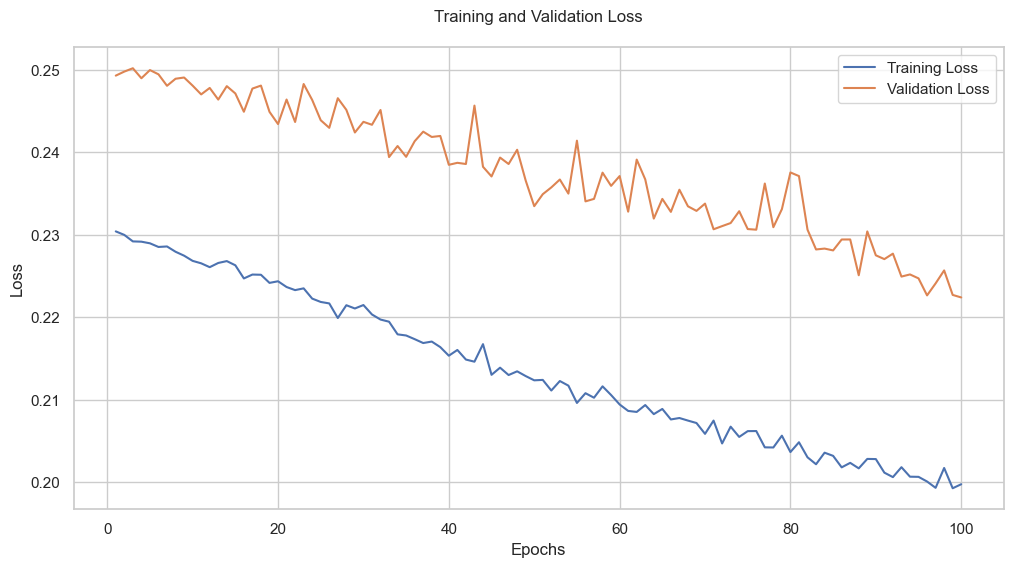

In [94]:
plt.figure(figsize=(12, 6))

train_loss = result.history['loss']
val_loss = result.history['val_loss']
epoch = range(1, 101)

sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')

plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

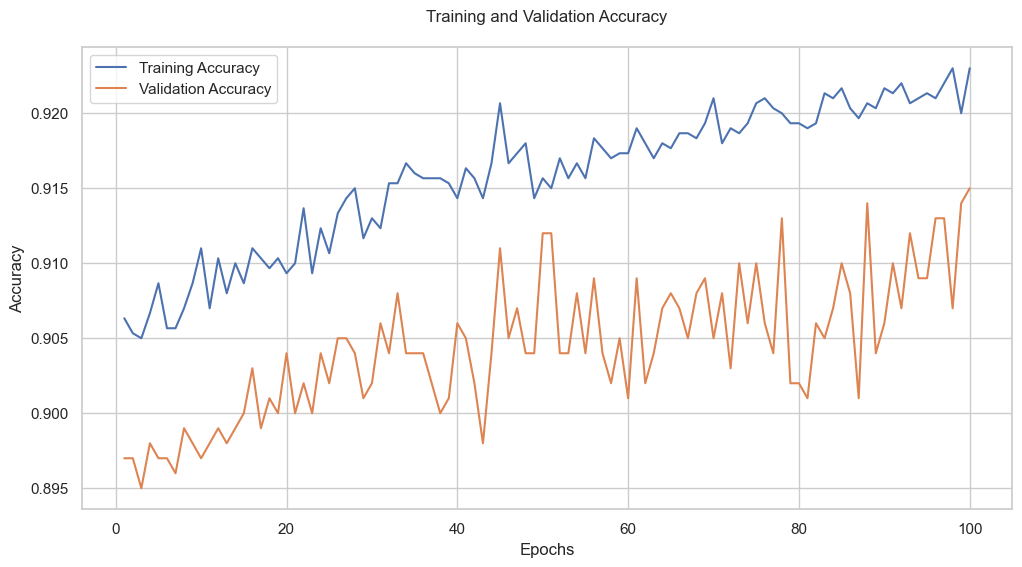

In [95]:
plt.figure(figsize=(12, 6))

train_loss = result.history['accuracy']
val_loss = result.history['val_accuracy']
epoch = range(1, 101)

sns.lineplot(x=epoch, y=train_loss, label='Training Accuracy')
sns.lineplot(x=epoch, y=val_loss, label='Validation Accuracy')

plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h1>Visualisasi model accuracy dan loss</h1>

In [79]:
acc = result.history['accuracy']
loss = result.history['loss']

epoch = [i + 1 for i in range(len(acc))]

In [80]:
acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : loss,
                            "Epoch" : epoch})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])

,Accuracy,Loss,Epoch
0,0.873000,0.293550,1
1,0.874000,0.292376,2
2,0.871667,0.289420,3
3,0.876000,0.289810,4
4,0.874000,0.287416,5
5,0.876667,0.287285,6
6,0.879000,0.286958,7
7,0.878000,0.285043,8
8,0.875000,0.285516,9
9,0.876667,0.283886,10


In [81]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Loss'],
                         mode='lines+markers',
                         name = 'Loss'))

fig.update_layout(title = {'text': "<b>Training Accuracy Vs Training Loss</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Accuracy / Loss",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()



<h1>Evaluating model</h1> 

In [82]:
loss, acc = model.evaluate(X_test, Y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.2361


In [83]:
print(f"Accuracy on unseen data is: { np.round(acc, 2) }")
print(f'Loss on unseen data is: { np.round(loss, 2) }')

Accuracy on unseen data is: 0.9
Loss on unseen data is: 0.25


<h1>Classification report</h1>

In [84]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [85]:
print(accuracy_score(Y_test[['good']], prediction))

0.896


In [86]:
print(accuracy_score(Y_test[['bad']], prediction))

0.104


In [130]:
print(classification_report(Y_test[['good']], prediction))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       501
           1       0.89      0.91      0.90       499

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

